In [9]:
#-------------------------------
## install and load necessary libraries for data analyses
#-------------------------------
p <- c("reshape2","ggplot2","pheatmap", "cowplot")
usePackage <- function(p) {
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, dep=TRUE, repos="https://cloud.r-project.org/")
  suppressWarnings(suppressMessages(invisible(require(p, character.only=TRUE))))
}
invisible(lapply(p, usePackage))

In [37]:
setwd("/Users/huangshi/MyProjects/CMI-IBM/age-prediction/")

In [11]:
gut_sample_metadata <- "Input/gut_data/gut_4434_map.txt" 
oral_sample_metadata <- "Input/oral_data/oral_2550_map.txt" 
skin_sample_metadata <- "Input/skin_data/skin_1975_map.txt" 

In [12]:
gut_metadata<-read.table(gut_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")
oral_metadata<-read.table(oral_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")
skin_metadata<-read.table(skin_sample_metadata,header=T,sep="\t",row.names=1, quote="", comment.char="")

In [13]:
gut_age<-data.frame(age=gut_metadata[, "age"], data="gut")
oral_age<-data.frame(age=oral_metadata[, "qiita_host_age"], data="oral")
skin_age<-data.frame(age=skin_metadata[, "qiita_host_age"], data="skin")

In [14]:
age_data<-rbind(gut_age, oral_age, skin_age)

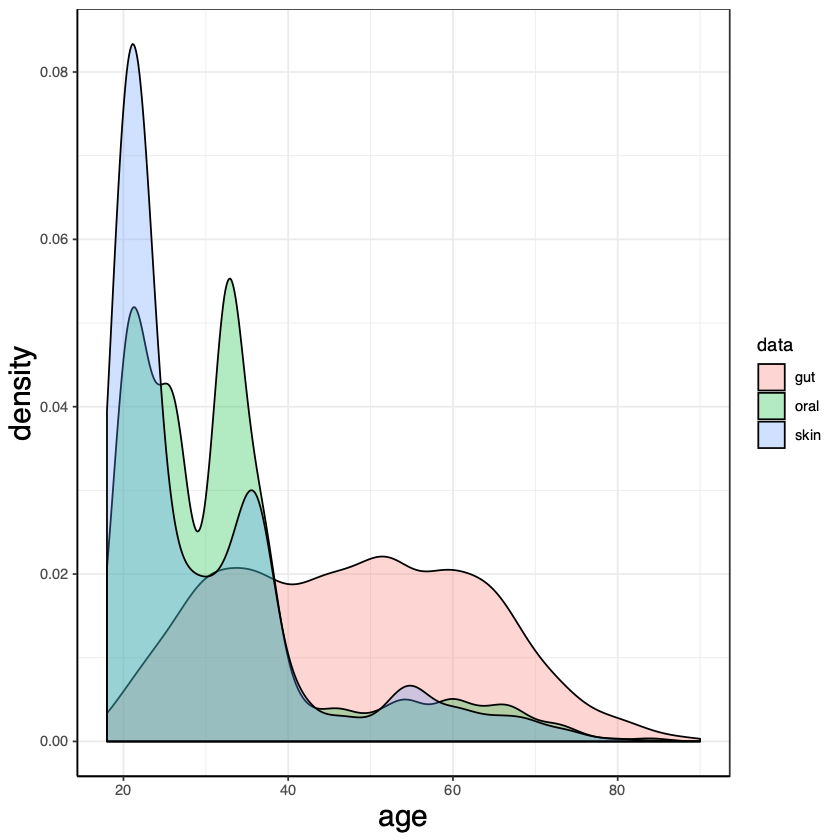

In [100]:
p_age<-ggplot(age_data, aes(age, fill = data)) + geom_density(alpha = 0.3)+
       theme_bw()+
       theme(
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"))
p_age
#ggsave(filename="./Figures/Figure_S1.pdf", plot=p, device="pdf", width=4, height=4)

In [85]:
oral_sub_res_file <- "Output/oral_2550_by_sex_RF.reg_out/sub_train.age.obs_vs_pred.results.xls" 
oral_res_file <- "Output/oral_2550_by_sex_RF.reg_out/train.age.obs_vs_pred.results.xls" 

skin_sub_res_file <- "Output/skin_1975_by_site_sex_RF.reg_out/sub_train.age.obs_vs_pred.results.xls" 
skin_res_file <- "Output/skin_1975_by_site_sex_RF.reg_out/train.age.obs_vs_pred.results.xls" 

oral_sub_res<-read.table(oral_sub_res_file,header=T,sep="\t",row.names=1, quote="", comment.char="")
oral_res<-read.table(oral_res_file,header=T,sep="\t",row.names=1, quote="", comment.char="")
skin_sub_res<-read.table(skin_sub_res_file,header=T,sep="\t",row.names=1, quote="", comment.char="")
skin_res<-read.table(skin_res_file,header=T,sep="\t",row.names=1, quote="", comment.char="")



In [86]:
dim(oral_sub_res)
dim(oral_res)
dim(skin_sub_res)
dim(skin_res)

[1] 718   2

[1] 2550    2

[1] 578   2

[1] 1975    2

## scatter plot: Predicted age VS Reported age

In [45]:
plot_obs_VS_pred <- function(y, predicted_y, target_field, span=1, outdir=NULL){
  df<-data.frame(y, predicted_y)
  p<-ggplot(df, aes(x=y, y=predicted_y))+
    ylab(paste("Predicted ",target_field,sep=""))+
    xlab(paste("Reported ",target_field,sep=""))+
    geom_point(alpha=0.1)+
    geom_smooth(method="loess",span=span)+
    theme_bw()+ #theme_classic() +
    theme(
        axis.title = element_text(size=18),
        axis.line = element_line(color="black"),
        strip.background = element_rect(colour = "white"), panel.border = element_blank())
  if(!is.null(outdir)){
    ggsave(filename=paste(outdir, target_field, ".obs_vs_pred.scatterplot.pdf",sep=""), plot=p, height=4, width=4)
    sink(paste(outdir, target_field, ".obs_vs_pred.results.xls",sep=""));cat("\t");write.table(df, quote=FALSE,sep="\t");sink()  
  }
  invisible(p)
}

In [87]:
length(which(oral_sub_res$y>40))
length(which(oral_sub_res$y<40))
length(which(oral_res$y>40))
length(which(oral_res$y<40))

[1] 359

[1] 356

[1] 359

[1] 2177

In [91]:
dim(skin_sub_res)
length(which(skin_sub_res$y>40))
length(which(skin_sub_res$y<40))
dim(skin_res)
length(which(skin_res$y>40))
length(which(skin_res$y<40))

[1] 578   2

[1] 289

[1] 289

[1] 1975    2

[1] 265

[1] 1701

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

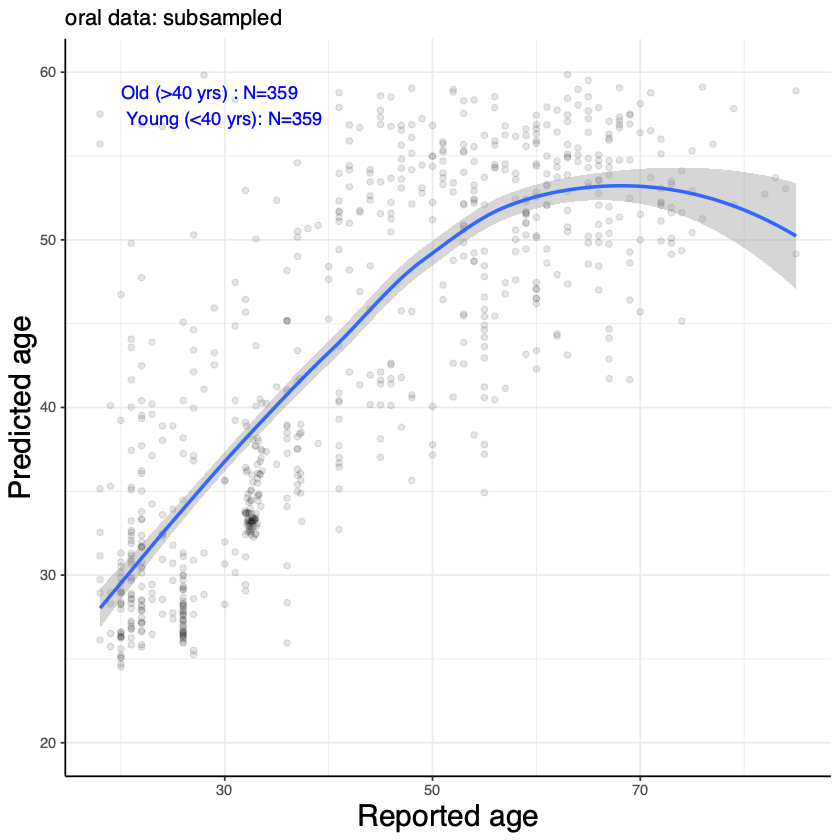

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

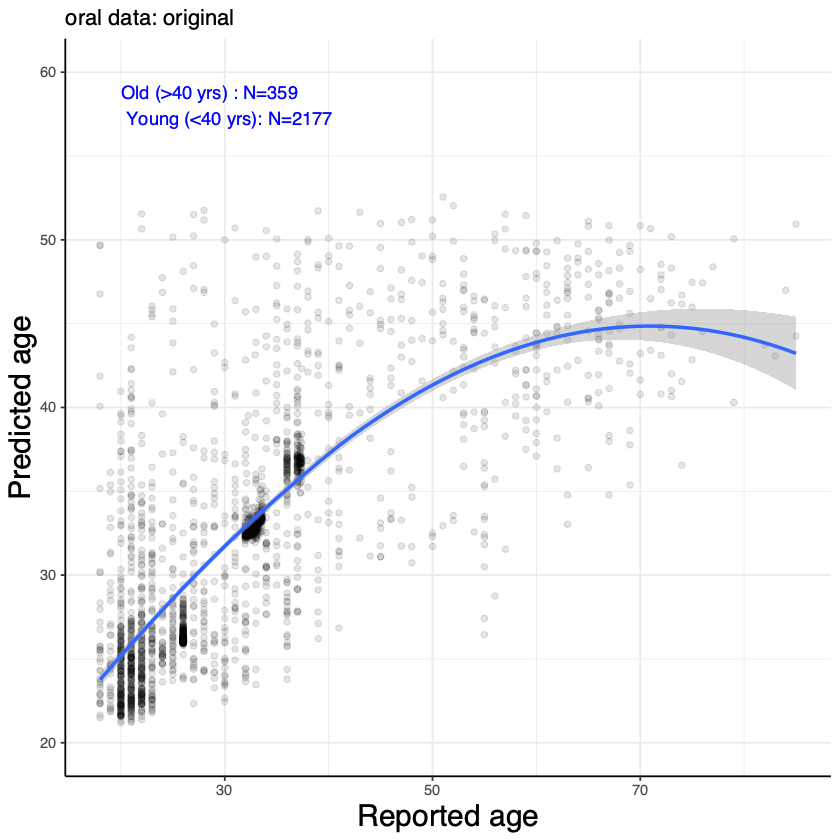

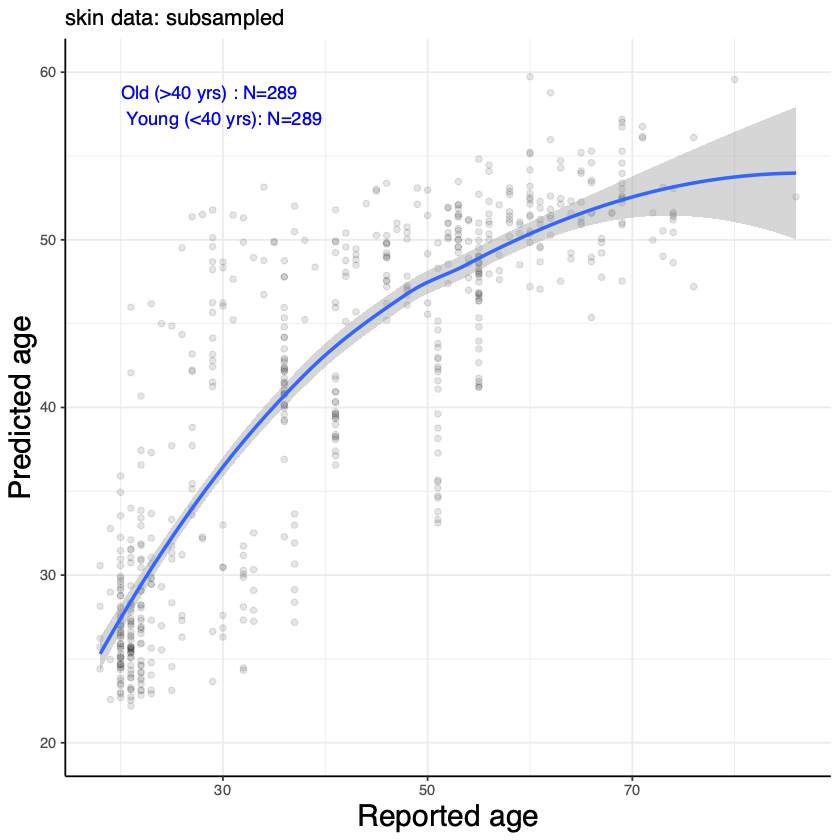

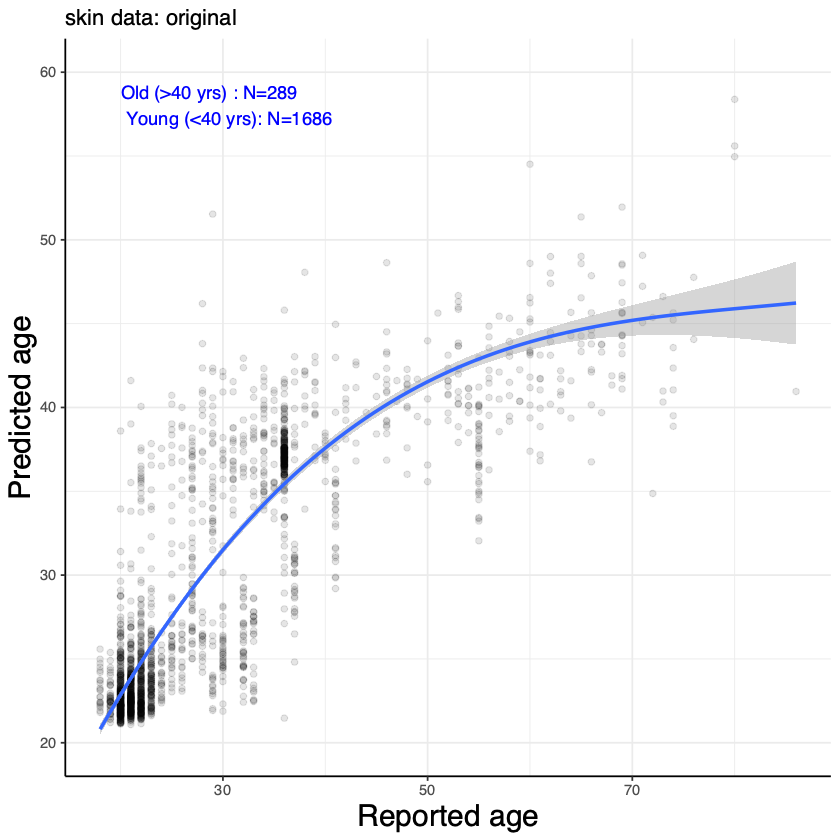

In [114]:
p_oral_sub<-plot_obs_VS_pred(oral_sub_res$y, oral_sub_res$predicted_y, target_field="age")
p_oral_sub<-p_oral_sub+ ggtitle("oral data: subsampled") + ylim(20, 60) + 
annotate("text", color="blue", x=20, y=58, label= "Old (>40 yrs) : N=359 \n Young (<40 yrs): N=359", hjust = 0)
p_oral_sub
p_oral<-plot_obs_VS_pred(oral_res$y, oral_res$predicted_y, target_field="age")
p_oral<-p_oral + ggtitle("oral data: original")+ ylim(20, 60)+ 
annotate("text",color="blue", x=20, y=58, label= "Old (>40 yrs) : N=359 \n Young (<40 yrs): N=2177", hjust = 0)
p_oral
p_skin_sub<-plot_obs_VS_pred(skin_sub_res$y, skin_sub_res$predicted_y, target_field="age")
p_skin_sub<-p_skin_sub+ggtitle("skin data: subsampled") + ylim(20, 60)+ 
annotate("text", color="blue",x=20, y=58, label= "Old (>40 yrs) : N=289 \n Young (<40 yrs): N=289", hjust = 0)
p_skin_sub
p_skin<-plot_obs_VS_pred(skin_res$y, skin_res$predicted_y, target_field="age")
p_skin<-p_skin+ ggtitle("skin data: original")+ ylim(20, 60)+ 
annotate("text", color="blue",x=20, y=58, label= "Old (>40 yrs) : N=289 \n Young (<40 yrs): N=1686", hjust = 0)
p_skin


Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

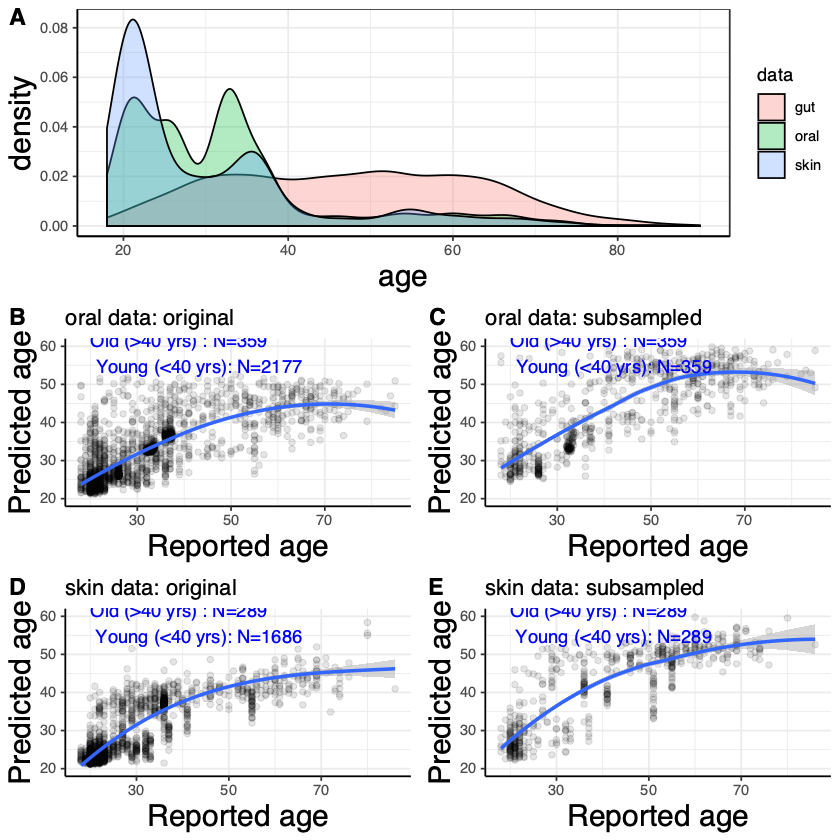

In [118]:
scatters<-plot_grid(p_oral, p_oral_sub, p_skin, p_skin_sub, 
              rel_widths = c(1, 1), rel_heights = c(1, 1), 
              ncol=2, 
              labels=c("B", "C", "D", "E"))
#scatters
f_S1<-plot_grid(p_age, scatters, rel_heights = c(1, 1.8), ncol=1, labels="A")
f_S1
ggsave(filename=paste("./Figures/Figure_S1.pdf",sep=""), plot=f_S1, height=12, width=8)

In [34]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.14.6

Matrix products: default
BLAS/LAPACK: /Users/huangshi/anaconda3/envs/r-env-ggplot2/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_0.9.4   pheatmap_1.0.12 ggplot2_3.1.1   reshape2_1.4.3 

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.18       RColorBrewer_1.1-2 compiler_3.5.1     pillar_1.3.0      
 [5] plyr_1.8.4         bindr_0.1.1        base64enc_0.1-3    tools_3.5.1       
 [9] digest_0.6.15      uuid_0.1-2         jsonlite_1.6       evaluate_0.11     
[13] tibble_1.4.2       gtable_0.2.0       pkgconfig_2.0.1    rlang_0.2.1       
[17] IRdisplay_0.5.0    IRkernel_0.8.12    bindrcpp_0.2.2     repr_0.15.0       
[21] withr_2.1.2        stringr_1.3.1      dplyr_0.7.6        grid_3.5